In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [91]:
df = pd.read_csv('../data/raw/train.csv')
print("The data is read.")

The data is read.


In [92]:
df.shape

(1460, 81)

## Outlier Handling

<AxesSubplot:xlabel='SalePrice'>

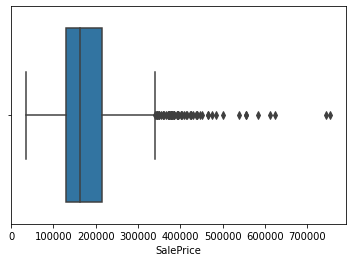

In [93]:
sns.boxplot(x = df['SalePrice'])

In [94]:
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
IQR = q3 - q1

In [95]:
 new_bound = q3 + 3*IQR

In [96]:
df.drop(df[df.SalePrice > new_bound].index, axis = 0, inplace = True)

In [97]:
df.shape

(1448, 81)

<AxesSubplot:xlabel='SalePrice'>

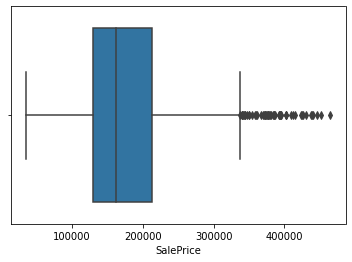

In [98]:
sns.boxplot(x = df['SalePrice'])

## Removing Multicolinearity

In [99]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [100]:
multi_col = numeric_features.corr().drop('SalePrice',axis =1)
multi_col = multi_col.drop('SalePrice',axis =0)

In [101]:
multi_col

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011384,-0.015600,-0.034650,-0.032695,0.016625,-0.016960,-0.023044,-0.060752,-0.008547,...,0.017351,-0.035956,-0.000237,0.003360,-0.046637,0.009238,0.050492,-0.006150,0.022275,0.002717
MSSubClass,0.011384,1.000000,-0.390667,-0.141298,0.037895,-0.061649,0.031317,0.042980,0.030365,-0.064442,...,-0.096829,-0.013257,-0.005905,-0.012690,-0.044081,-0.027999,0.008031,-0.007847,-0.015316,-0.019420
LotFrontage,-0.015600,-0.390667,1.000000,0.431501,0.232351,-0.058286,0.117686,0.082105,0.181184,0.223158,...,0.337640,0.085868,0.145840,0.014884,0.072104,0.035737,0.180687,0.004882,0.017135,0.010607
LotArea,-0.034650,-0.141298,0.431501,1.000000,0.090128,-0.005052,0.009037,0.007317,0.080648,0.206169,...,0.169712,0.160406,0.081546,-0.015425,0.021640,0.027182,0.079411,0.039217,0.003468,-0.015977
OverallQual,-0.032695,0.037895,0.232351,0.090128,1.000000,-0.093111,0.577075,0.549564,0.388579,0.218587,...,0.549344,0.234246,0.301198,-0.109594,0.033526,0.043706,0.043580,-0.030426,0.084068,-0.026839
OverallCond,0.016625,-0.061649,-0.058286,-0.005052,-0.093111,1.000000,-0.370838,0.076810,-0.126047,-0.039734,...,-0.152130,-0.000033,-0.037534,0.070265,0.025475,0.044050,0.003057,0.068966,-0.004256,0.048479
YearBuilt,-0.016960,0.031317,0.117686,0.009037,0.577075,-0.370838,1.000000,0.591884,0.310256,0.241390,...,0.477759,0.221978,0.192123,-0.387854,0.032297,-0.045224,-0.002628,-0.034069,0.016846,-0.019015
YearRemodAdd,-0.023044,0.042980,0.082105,0.007317,0.549564,0.076810,0.591884,1.000000,0.169709,0.120542,...,0.365005,0.204888,0.223239,-0.192091,0.046301,-0.047722,0.001242,-0.009683,0.025681,0.033460
MasVnrArea,-0.060752,0.030365,0.181184,0.080648,0.388579,-0.126047,0.310256,0.169709,1.000000,0.242080,...,0.356105,0.141457,0.123560,-0.108033,0.022608,0.062718,0.020933,-0.029431,0.008840,-0.012034
BsmtFinSF1,-0.008547,-0.064442,0.223158,0.206169,0.218587,-0.039734,0.241390,0.120542,0.242080,1.000000,...,0.285205,0.200679,0.113542,-0.100096,0.028597,0.064191,0.117350,0.004800,-0.008950,0.009197


In [102]:
df.shape

(1448, 81)

In [103]:
null_val = df.isnull().sum()
null_val = null_val[null_val > 0.2*1148]
null_val.sort_values(inplace = True)

In [104]:
null_val

LotFrontage     258
FireplaceQu     690
Fence          1169
Alley          1357
MiscFeature    1394
PoolQC         1442
dtype: int64

In [105]:
corr_m = numeric_features.corr()
corr_m = corr_m['SalePrice'].sort_values(ascending = False)
poor_cor = corr_m[corr_m.values < 0.35]
poor_cor

LotFrontage      0.336667
WoodDeckSF       0.334476
OpenPorchSF      0.325409
2ndFlrSF         0.287455
HalfBath         0.278858
LotArea          0.252031
BsmtFullBath     0.242846
BsmtUnfSF        0.211252
BedroomAbvGr     0.164610
ScreenPorch      0.081308
MoSold           0.079185
3SsnPorch        0.055720
PoolArea         0.033403
BsmtFinSF2      -0.011770
MiscVal         -0.019849
BsmtHalfBath    -0.031552
YrSold          -0.034292
Id              -0.034666
LowQualFinSF    -0.060257
OverallCond     -0.079676
MSSubClass      -0.086540
EnclosedPorch   -0.128520
KitchenAbvGr    -0.143610
Name: SalePrice, dtype: float64

In [123]:
null_val.index.values

array(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'], dtype=object)

In [124]:
to_remove = ['GarageCars','1stFlrSF','GrLivArea','FullBath','LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea', 'BsmtFinSF2',
       'MiscVal', 'BsmtHalfBath', 'YrSold', 'Id', 'LowQualFinSF',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr','LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC']

In [126]:
df.drop(to_remove,axis = 1,inplace = True)

In [127]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,836,TA,TA,Y,WD,Normal,250000
